In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Data Loading**

In [2]:
stroke_risk = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
stroke_risk

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Explanatory Data Analysis (EDA)**

 Untuk memahami struktur dataset stroke_risk, termasuk informasi tentang jumlah baris dan kolom, nama kolom, tipe data masing-masing kolom, serta jumlah nilai non-null di setiap kolom.

In [3]:
stroke_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


 Untuk mendapatkan statistik deskriptif dari kolom numerik di dataset

In [4]:
stroke_risk.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Univariate Analysis

In [5]:
stroke_risk.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# Assign categorical and numerical features
categorical_feature = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_feature = ['age', 'avg_glucose_level', 'bmi']

print('Fitur kategorikal:', categorical_feature)
print('Fitur numerikal:', numerical_feature)

Fitur kategorikal: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
Fitur numerikal: ['age', 'avg_glucose_level', 'bmi']


### Categorical Analysis

 Dari plot yang telah dibuat, didapatkan informasi bahwa dataset yang digunakan berisi lebih banyak data yang mengidap stroke dibanding yang normal.

<ipython-input-7-ea44dff10b4b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stroke_plot = sns.countplot(x=stroke_risk['stroke'], order=stroke_risk['stroke'].value_counts().index, palette=stroke_color)
<ipython-input-7-ea44dff10b4b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  stroke_plot.set_xticklabels(stroke_label, fontsize=15)


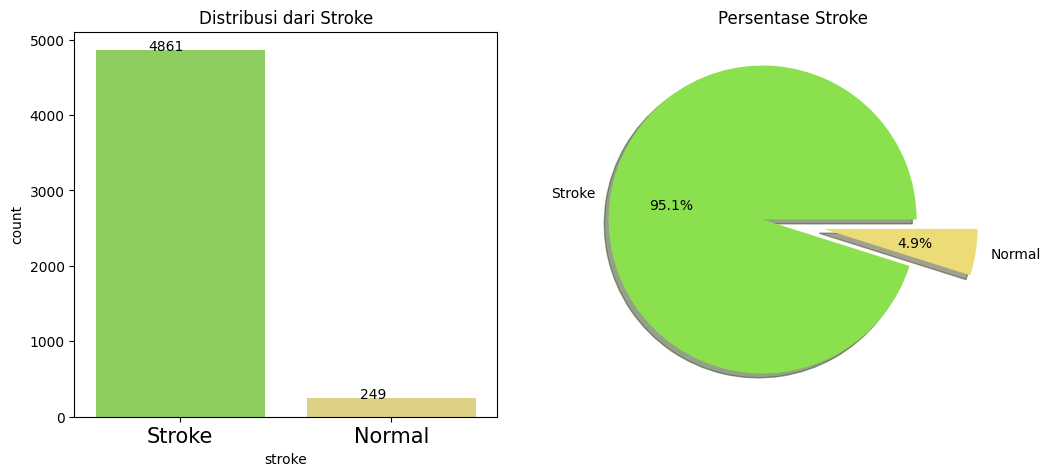

In [7]:
# Label dan warna untuk stroke
stroke_label = ['Stroke', 'Normal']
stroke_color = ["#8be04e", "#ebdc78"]

# Plot distribusi stroke
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stroke_plot = sns.countplot(x=stroke_risk['stroke'], order=stroke_risk['stroke'].value_counts().index, palette=stroke_color)
stroke_plot.set_title('Distribusi dari Stroke')
stroke_plot.set_xticklabels(stroke_label, fontsize=15)
for p in stroke_plot.patches:
    stroke_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
stroke_pie = stroke_risk['stroke'].value_counts()
stroke_pie = stroke_pie.plot.pie(explode=[0.2, 0.2], labels=stroke_label, autopct='%1.1f%%', shadow=True, colors=stroke_color)
stroke_pie.set_title(label='Persentase Stroke')
plt.axis('off')

plt.show()

 Dari plot yang dibuat, dapat diketahui bahwa distribusi jenis kelamin pada dataset lebih banyak Wanita dibandingkan Pria.

<ipython-input-8-a8efc14e728f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.countplot(x=stroke_risk['gender'], palette=gender_colors)
<ipython-input-8-a8efc14e728f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gender_plot.set_xticklabels(gender_labels, fontsize=15)


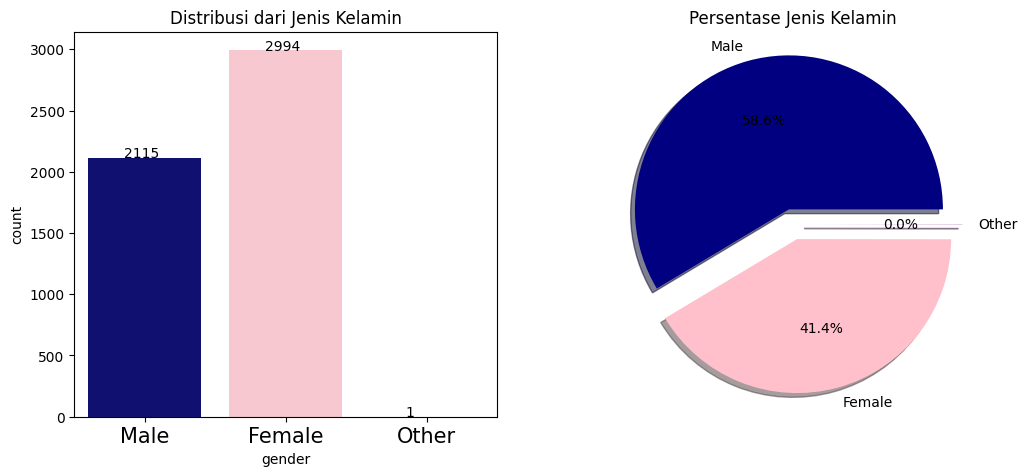

In [8]:
# Menyesuaikan label berdasarkan nilai unik dalam gender
gender_labels = stroke_risk['gender'].unique()
gender_colors = ['navy', 'pink', 'purple'][:len(gender_labels)]  # Menyesuaikan warna sesuai jumlah kategori

# Plot distribusi gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
gender_plot = sns.countplot(x=stroke_risk['gender'], palette=gender_colors)
gender_plot.set_title('Distribusi dari Jenis Kelamin')
gender_plot.set_xticklabels(gender_labels, fontsize=15)
for p in gender_plot.patches:
    gender_plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(1, 2, 2)
gender_pie = stroke_risk['gender'].value_counts()
gender_pie = gender_pie.plot.pie(explode=[0.1] * len(gender_labels), labels=gender_labels, autopct='%1.1f%%', shadow=True, colors=gender_colors)
gender_pie.set_title(label='Persentase Jenis Kelamin')
plt.axis('off')

plt.show()

### Numerical Analysis

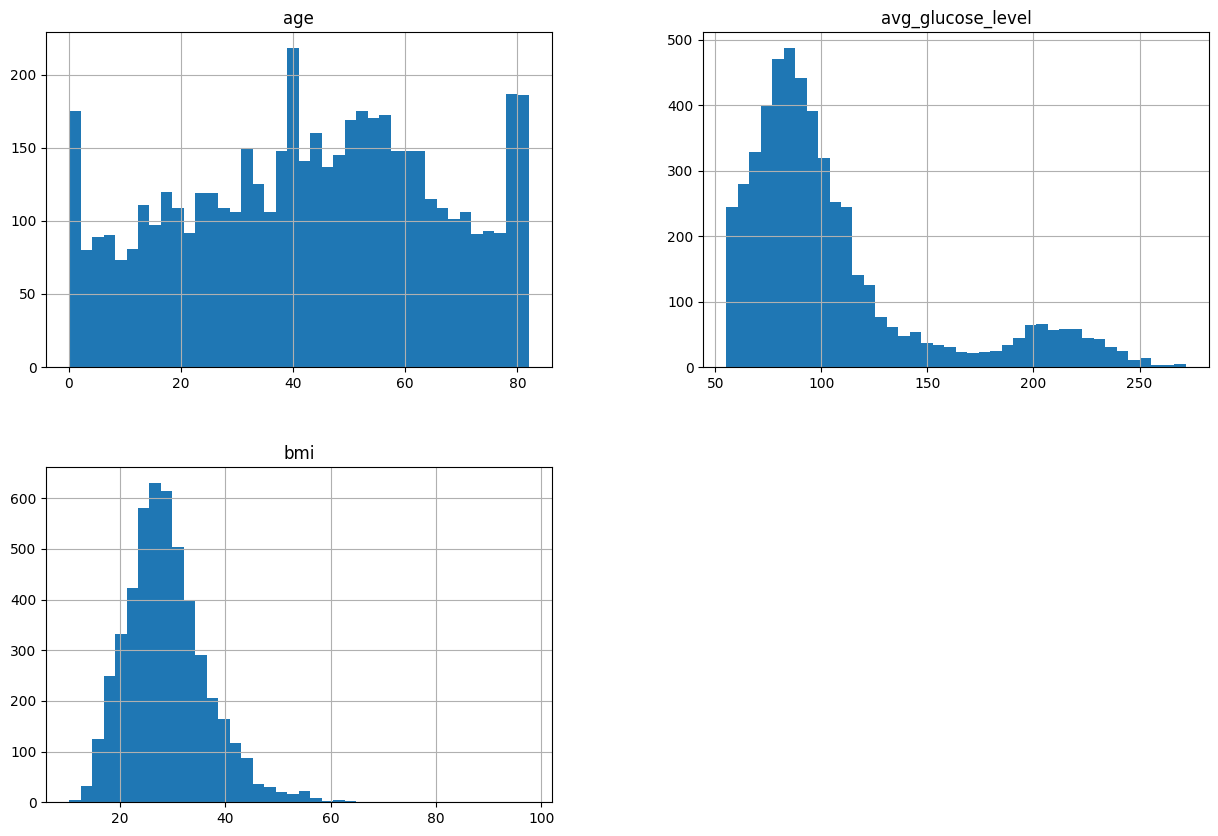

In [9]:
# Menampilkan histogram untuk fitur numerik
stroke_risk[['age', 'avg_glucose_level', 'bmi']].hist(bins=40, figsize=(15, 10))
plt.show()

### Multivariate Analysis

#### Categorical analysis

 Pada *categorical analysis* ini dilakukan pengecekan rata-rata dari tiap fitur kategorikal terhadap stroke

<Figure size 1200x700 with 0 Axes>

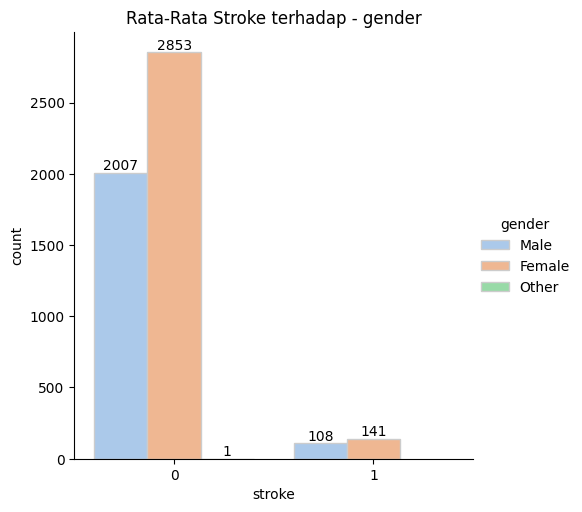

<Figure size 1200x700 with 0 Axes>

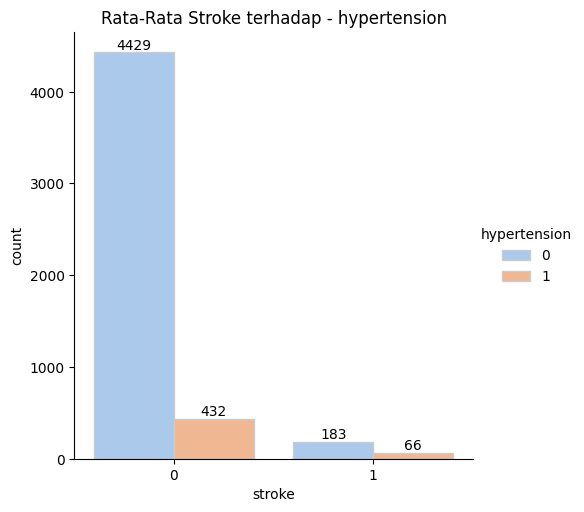

<Figure size 1200x700 with 0 Axes>

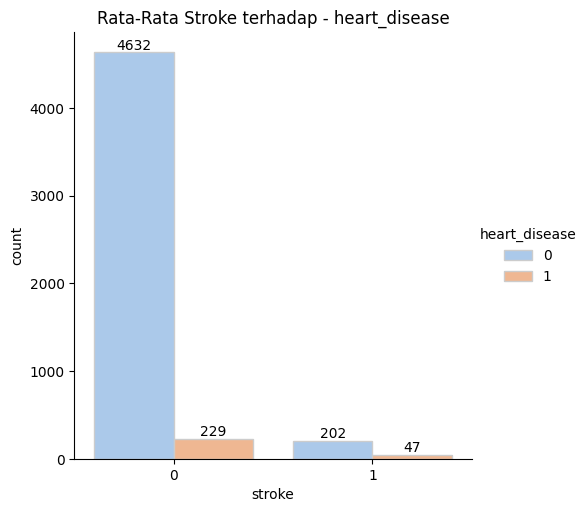

<Figure size 1200x700 with 0 Axes>

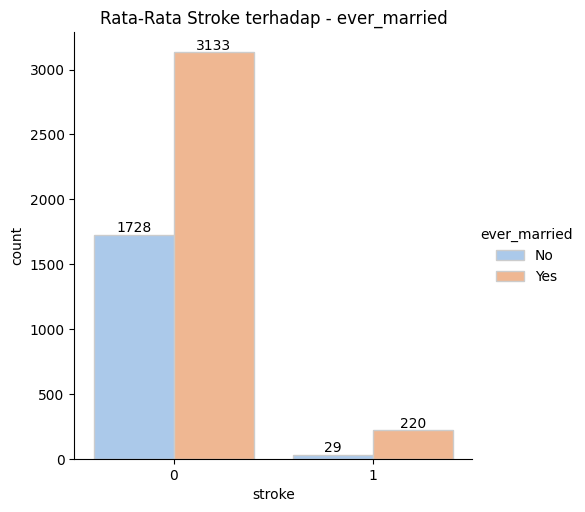

<Figure size 1200x700 with 0 Axes>

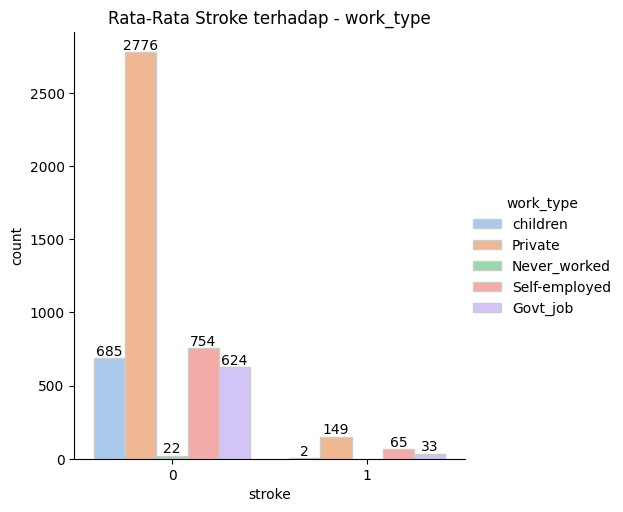

<Figure size 1200x700 with 0 Axes>

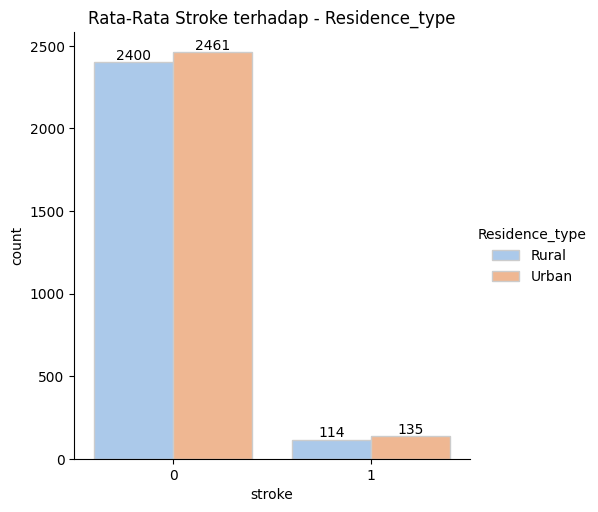

<Figure size 1200x700 with 0 Axes>

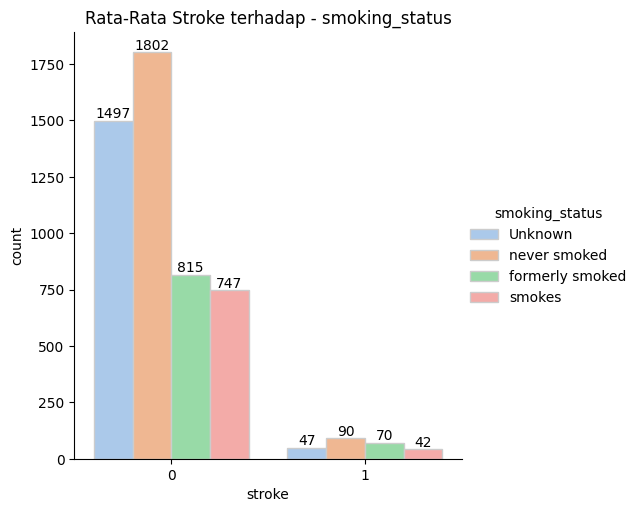

In [10]:
# Analisis Multivariat pada fitur kategorikal terhadap stroke
for i in range(len(categorical_feature) - 1):
    plt.figure(figsize=(12, 7))
    catp = sns.catplot(x='stroke', data=stroke_risk, hue=categorical_feature[i], kind='count', palette='pastel', edgecolor='.8')
    ax = catp.facet_axis(0, 0)

    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

    plt.title(f'Rata-Rata Stroke terhadap - {categorical_feature[i]}')
    plt.show()

In [11]:
categorical_feature

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

#### Numerical analysis

In [12]:
stroke_risk.select_dtypes(['int64', 'float64'])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


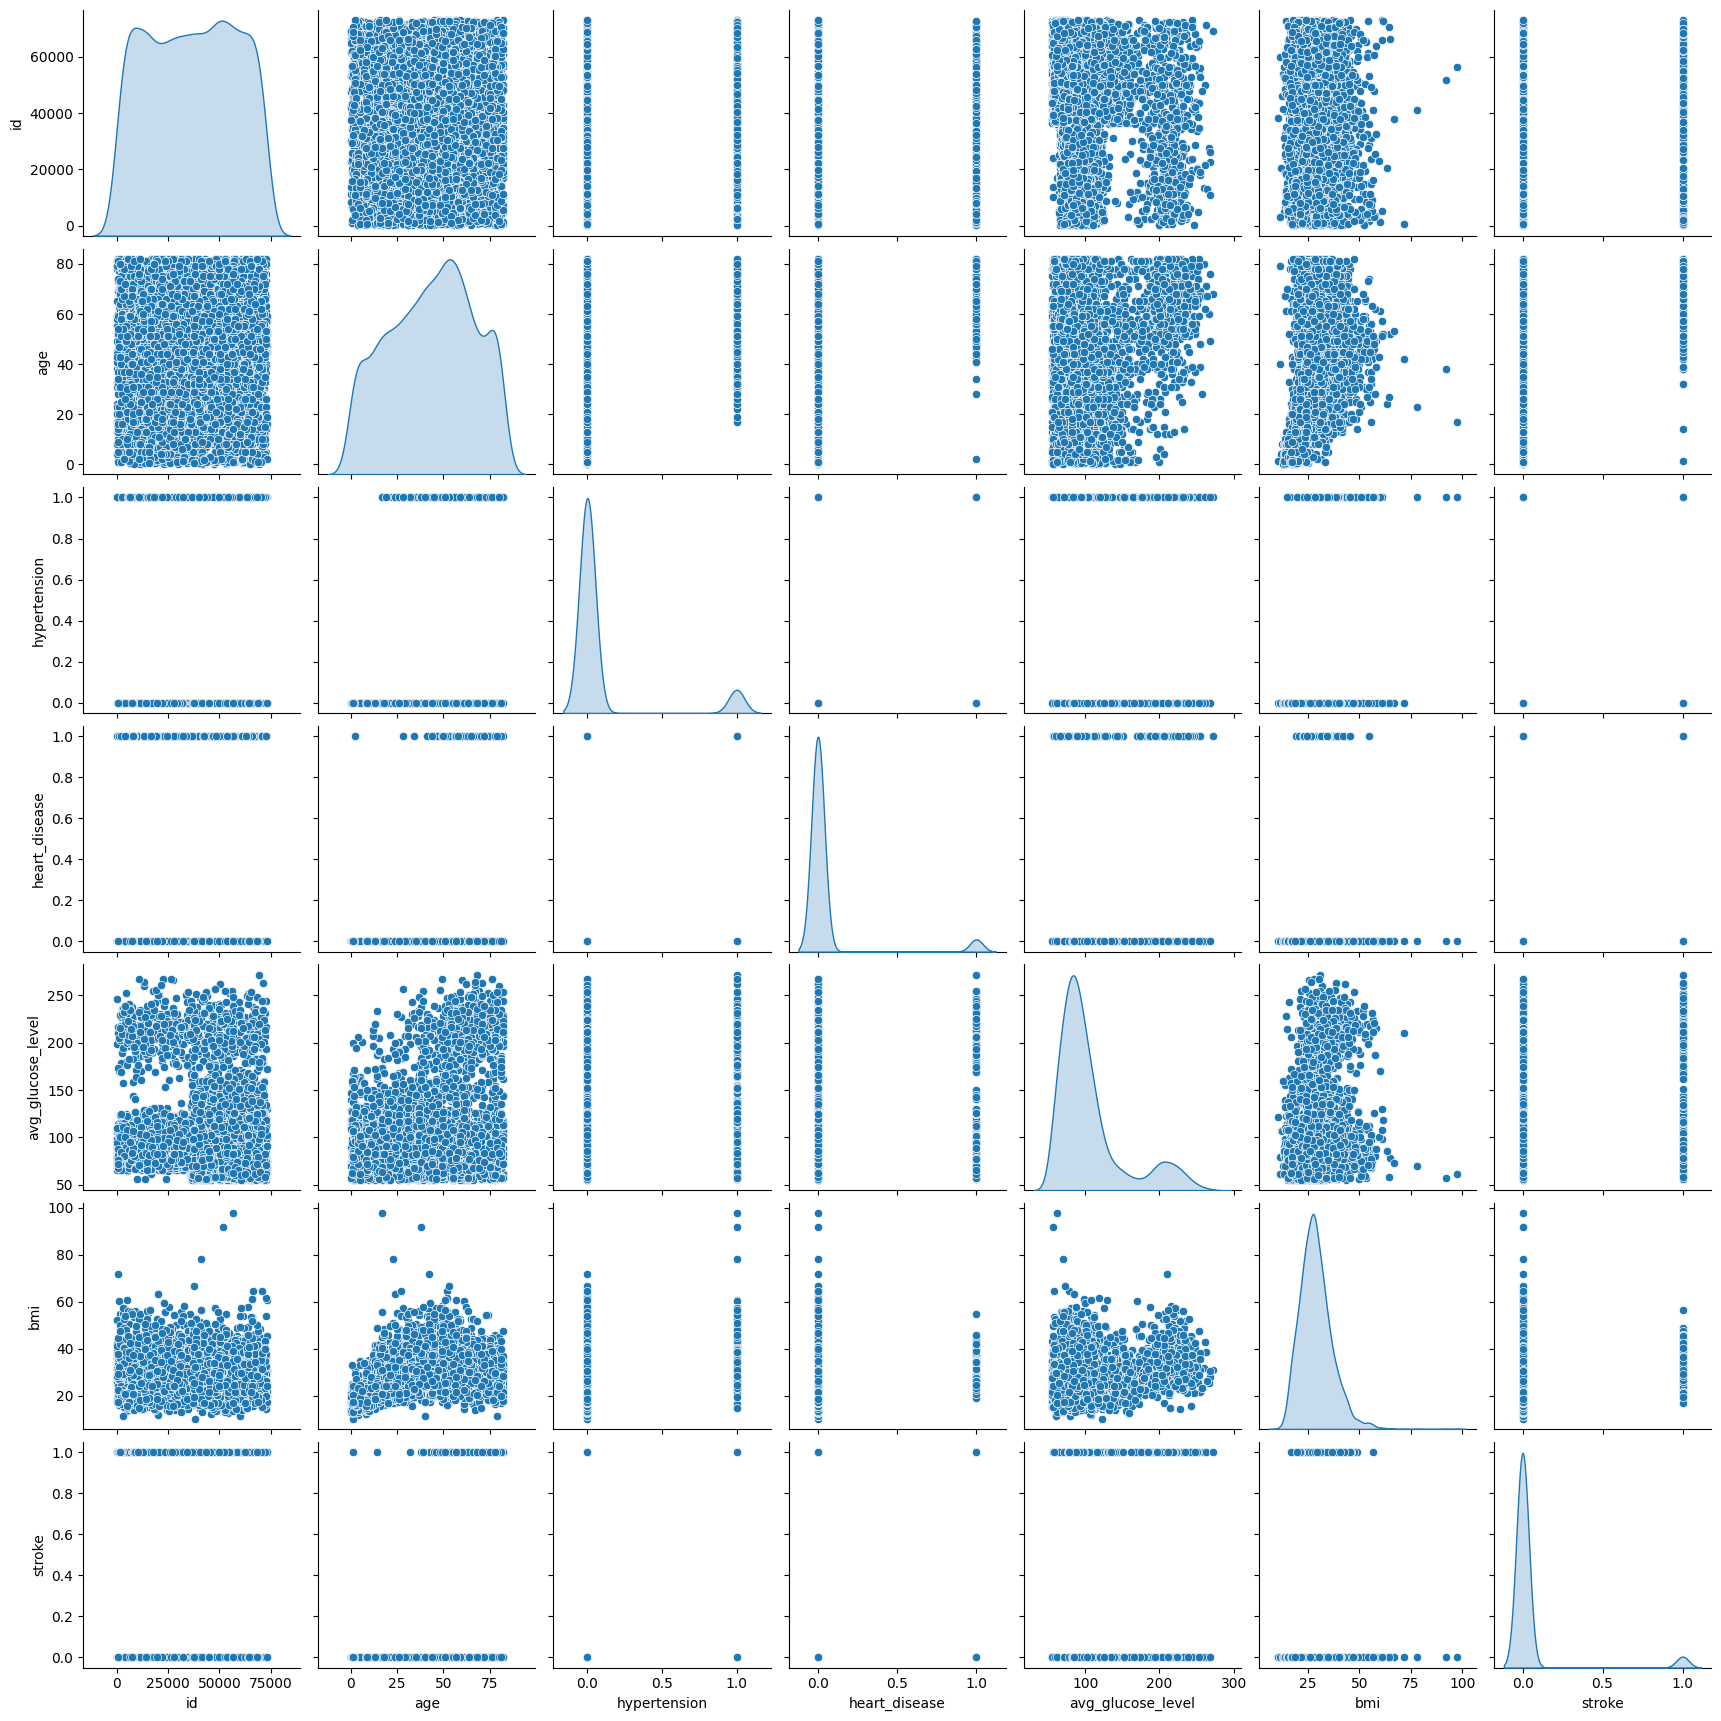

In [13]:
sns.pairplot(stroke_risk.select_dtypes(['int64', 'float64']), diag_kind = 'kde')

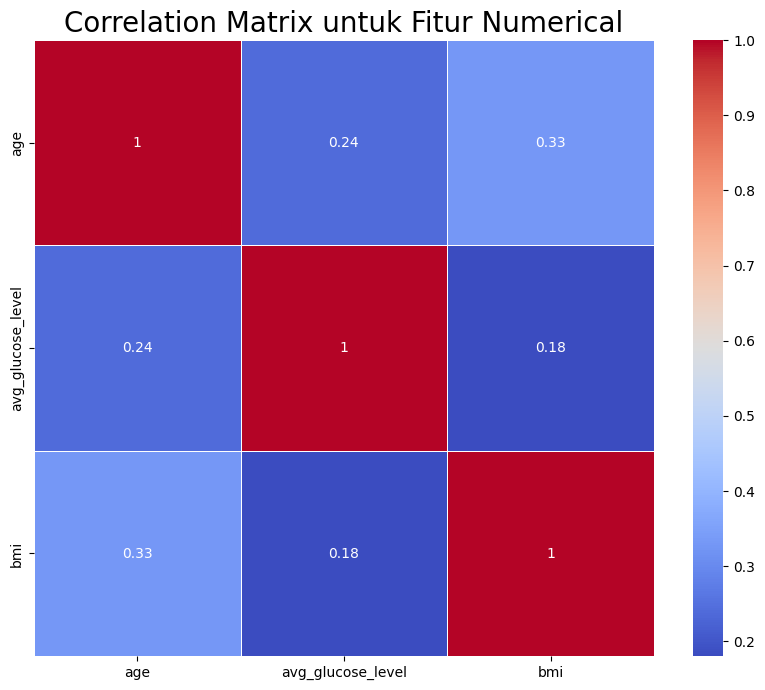

In [14]:
# Membuat correlation matrix untuk fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = stroke_risk[numerical_feature].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerical", size=20)
plt.show()

## **Data Preparation**

### Check Outlier

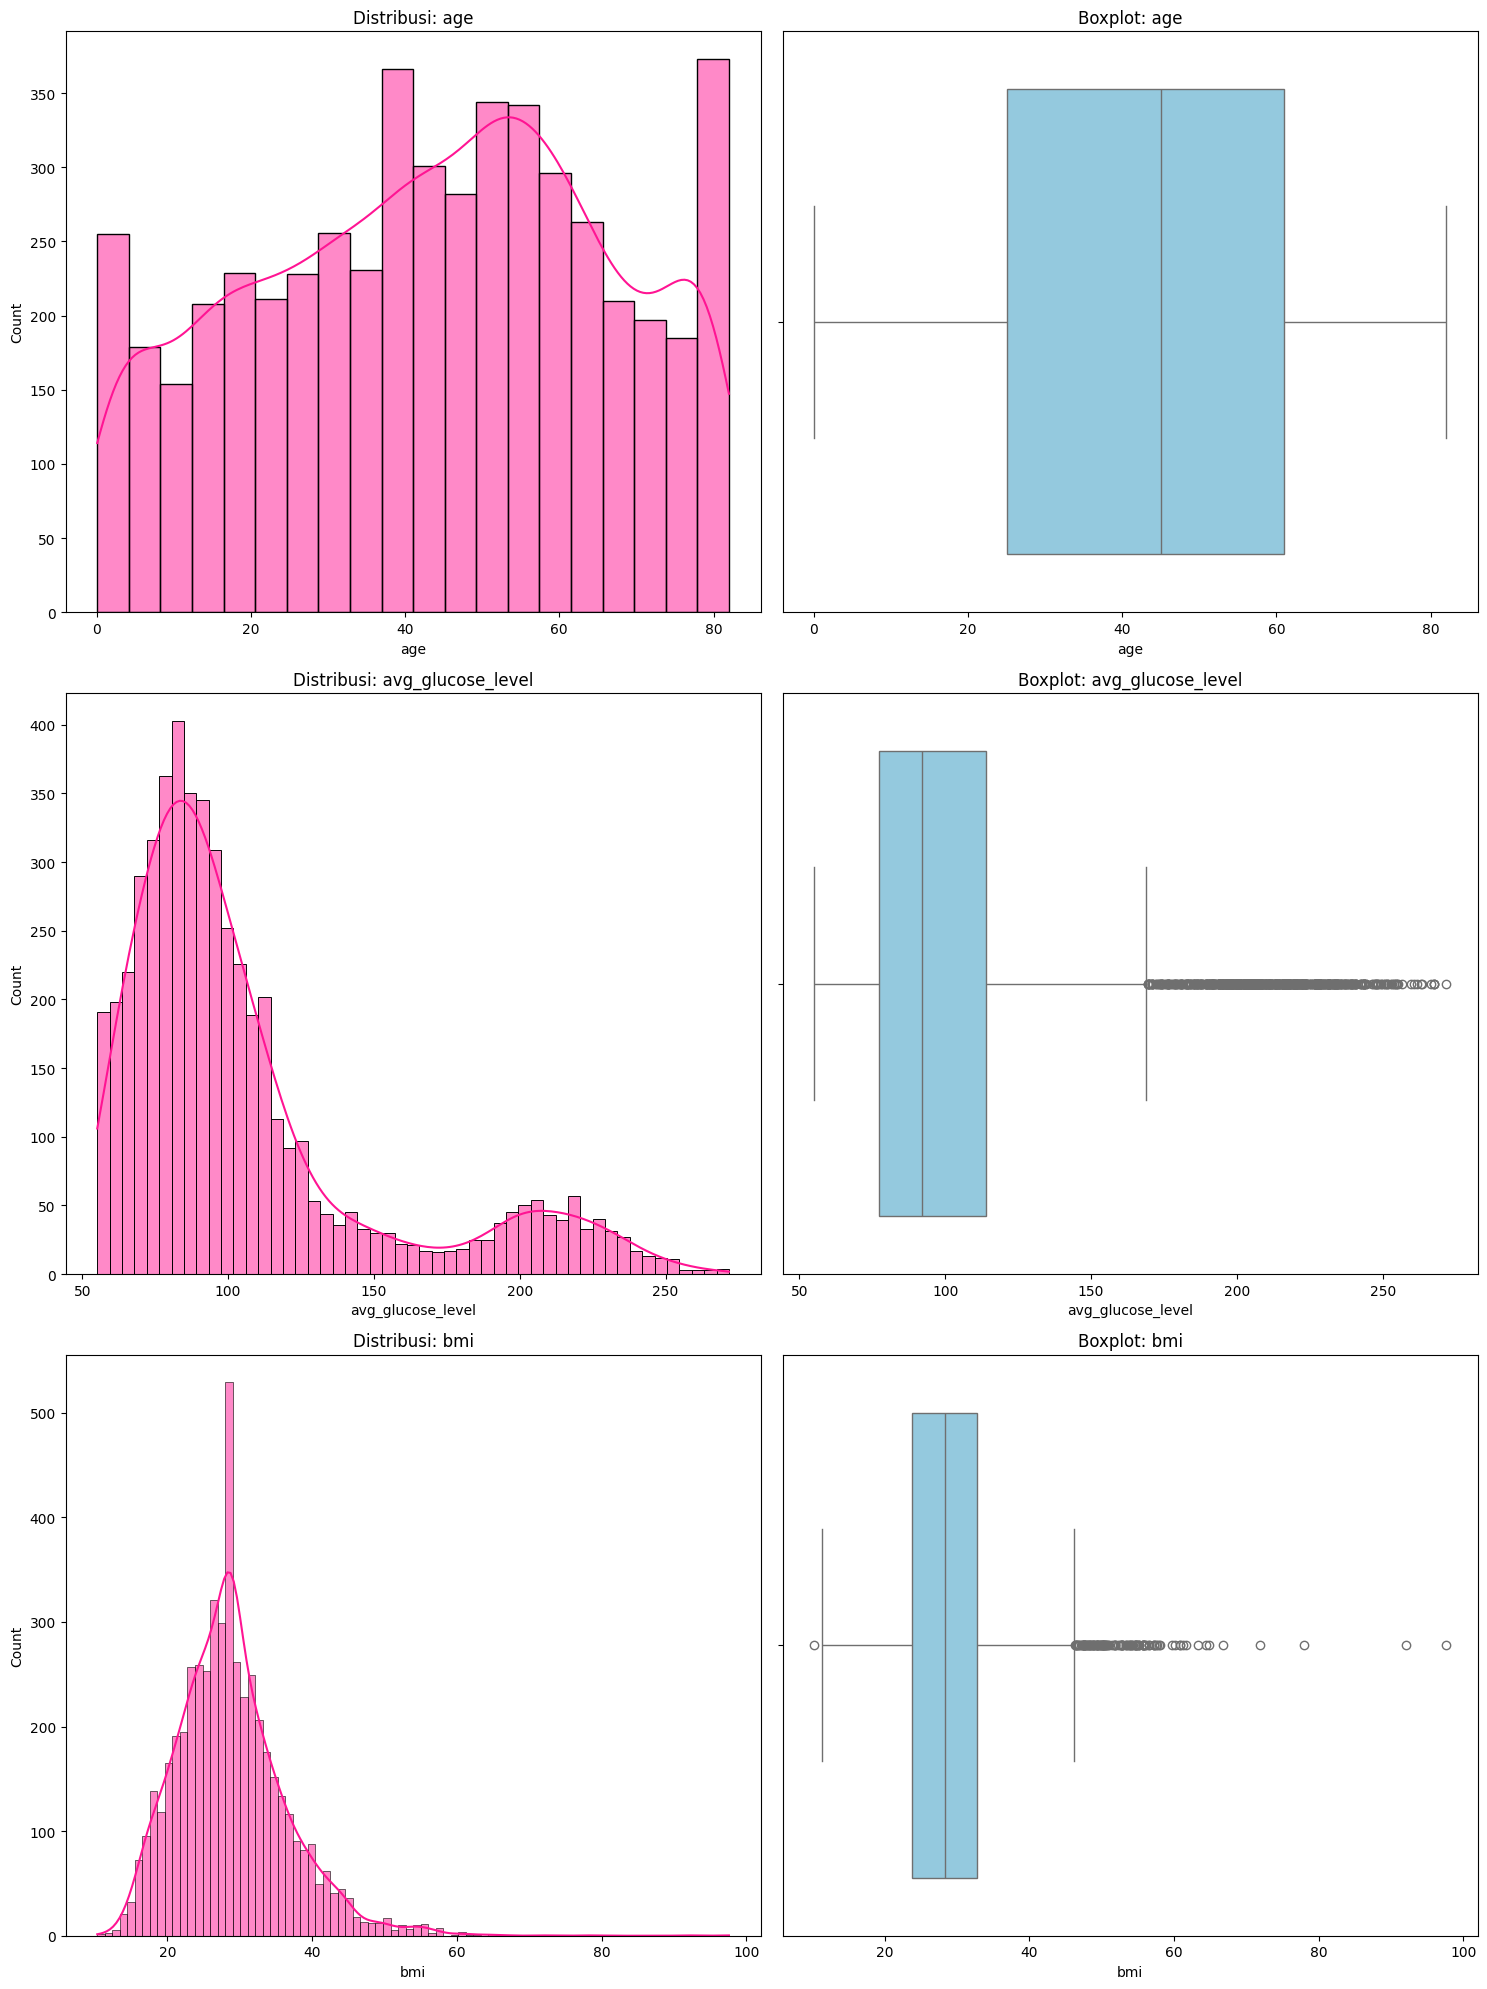

In [48]:
# Visualisasi distribusi data dan outlier
plt.figure(figsize=(15, 20))

# Kolom-kolom numerik yang relevan untuk dataset stroke prediction
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Visualisasi distplot dan boxplot untuk masing-masing kolom
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, i * 2 + 1)
    sns.histplot(stroke_risk[column], kde=True, color='DeepPink')
    plt.title(f'Distribusi: {column}')

    plt.subplot(len(numerical_columns), 2, i * 2 + 2)
    sns.boxplot(x=stroke_risk[column], color='SkyBlue')
    plt.title(f'Boxplot: {column}')

plt.tight_layout()
plt.show()

### Handling Outlier

 Untuk mendeteksi dan menghapus nilai ekstrim (outlier) pada dataset dengan metode IQR (Interquartile Range).

Dataset sebelum menghapus outlier: (5110, 11)
Dataset setelah menghapus outlier: (4391, 11)


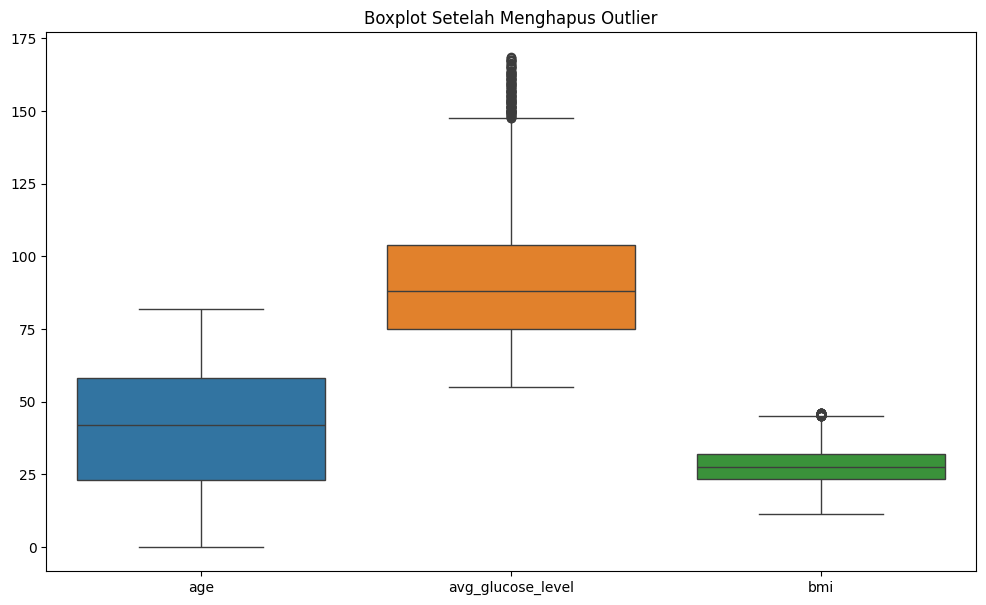

In [49]:
# Handling Outliers dengan metode IQR
data_outlier = stroke_risk[numerical_columns]

# Menghitung Q1, Q3, dan IQR
Q1 = data_outlier.quantile(0.25)
Q3 = data_outlier.quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus data stroke_risk
filtered_data = stroke_risk[
    ~((data_outlier < lower_bound) | (data_outlier > upper_bound)).any(axis=1)
]

print(f"Dataset sebelum menghapus outlier: {stroke_risk.shape}")
print(f"Dataset setelah menghapus outlier: {filtered_data.shape}")

# Menampilkan boxplot setelah outlier dihapus
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_data[numerical_columns])
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

### Handling Missing Value

 Untuk menangani nilai yang tidak valid (misalnya bmi = 0) dengan menggantinya menggunakan nilai median.

In [15]:
stroke_risk.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [16]:
stroke_risk['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [17]:
stroke_risk['bmi'].fillna(stroke_risk['bmi'].mean(),inplace=True)
stroke_risk.isnull().sum()

<ipython-input-17-71f0be096875>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_risk['bmi'].fillna(stroke_risk['bmi'].mean(),inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


### Feature Engineering

In [18]:
# Menghapus kolom 'id'
stroke_risk.drop('id',axis=1,inplace=True)
stroke_risk.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

In [20]:
gender=enc.fit_transform(stroke_risk['gender'])

In [21]:
smoking_status=enc.fit_transform(stroke_risk['smoking_status'])

In [22]:
work_type=enc.fit_transform(stroke_risk['work_type'])
Residence_type=enc.fit_transform(stroke_risk['Residence_type'])
ever_married=enc.fit_transform(stroke_risk['ever_married'])

In [23]:
stroke_risk['work_type']=work_type

In [24]:
stroke_risk['ever_married']=ever_married
stroke_risk['Residence_type']=Residence_type
stroke_risk['smoking_status']=smoking_status
stroke_risk['gender']=gender

In [25]:
stroke_risk

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [26]:
stroke_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


<Axes: >

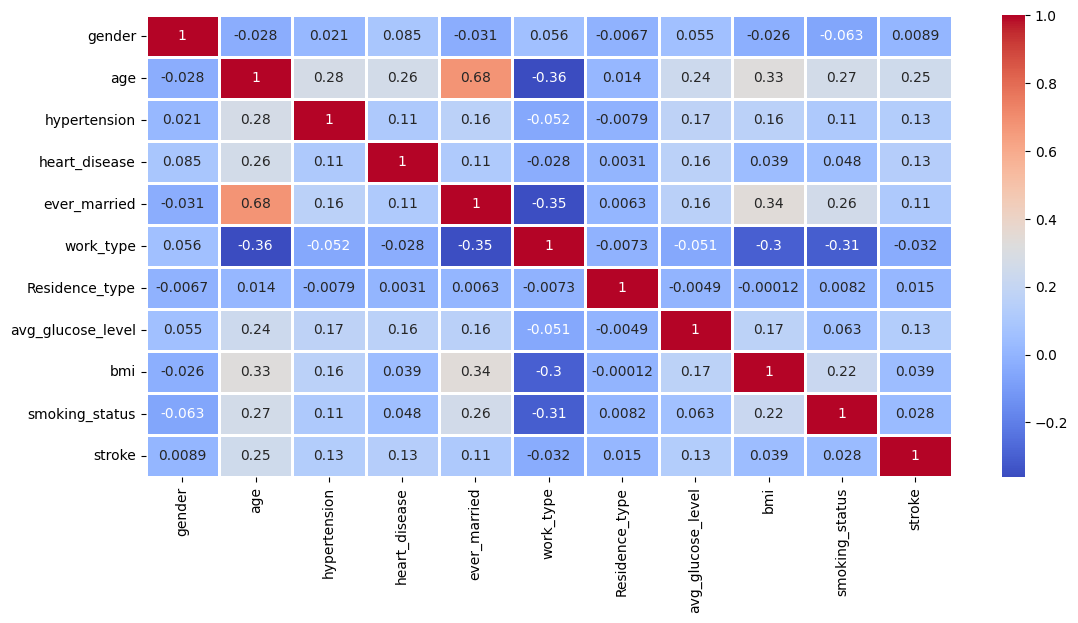

In [27]:
#Correlation between all features
fig , ax = plt.subplots(figsize=(13,6))
sns.heatmap(stroke_risk.corr(), cmap="coolwarm", linecolor='white' , annot=True , linewidths=1 , ax=ax )

#### Train Test Split

 Membagi dataset menjadi dua bagian, yaitu data latih (training set) dan data uji (test set), untuk membangun dan menguji performa model.

In [28]:
X=stroke_risk.drop('stroke',axis=1)
Y=stroke_risk['stroke']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

print('Shape dari Xtrain', X_train.shape)
print('Shape dari Xest', X_test.shape)

Shape dari Xtrain (4088, 10)
Shape dari Xest (1022, 10)


#### Standarization

 Melakukan standardisasi fitur agar berada dalam skala yang sama. Hal ini penting untuk algoritma yang sensitif terhadap skala fitur, seperti SVM, Logistic Regression.

In [30]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

## **Modeling**

 Membuat sebuah DataFrame untuk menyimpan hasil evaluasi performa model pada data latih dan data uji.

In [31]:
# Membuat dataframe untuk menyimpan hasil evaluasi model
model = pd.DataFrame(index=['train_mse', 'test_mse'],
                     columns=['DecisionTree', 'LogisticRegression', 'SVM'])

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import mean_squared_error, accuracy_score

# Membuat dataframe untuk menyimpan hasil evaluasi model
model = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['DecisionTree', 'LogisticRegression', 'SVM'])

### Decision Tree

 Melatih model Decision Tree Classifier dan mengevaluasi performanya pada data latih dan data uji menggunakan metrik Mean Squared Error (MSE).

 DecisionTreeClassifier diimpor dari library sklearn.tree. Model ini bekerja dengan membagi dataset menjadi cabang-cabang berdasarkan fitur tertentu untuk membuat keputusan.

In [33]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_std, Y_train)
model.loc['train_mse', 'DecisionTree'] = mean_squared_error(Y_train, dt.predict(X_train_std))
model.loc['test_mse', 'DecisionTree'] = mean_squared_error(Y_test, dt.predict(X_test_std))

### Logistic Regression

 Menerapkan model Logistic Regression untuk melakukan prediksi dan mengevaluasi performanya pada data latih dan data uji menggunakan metrik Mean Squared Error (MSE).

 Model Logistic Regression diimpor dari sklearn.linear_model menggunakan fungsi LogisticRegression. Model ini adalah algoritma klasifikasi yang berbasis probabilitas.

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, Y_train)
model.loc['train_mse', 'LogisticRegression'] = mean_squared_error(Y_train, lr.predict(X_train_std))
model.loc['test_mse', 'LogisticRegression'] = mean_squared_error(Y_test, lr.predict(X_test_std))

### Support Vector Machine (SVM)

 Mengaplikasikan model Support Vector Machine (SVM) untuk melakukan klasifikasi dan mengevaluasi performa model pada data latih dan data uji dengan menggunakan metrik Mean Squared Error (MSE).

 Model Support Vector Classifier (SVC) diimpor dari modul sklearn.svm. Algoritma SVM bekerja dengan mencari hyperplane terbaik untuk memisahkan kelas dalam data.

In [35]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train_std, Y_train)
model.loc['train_mse', 'SVM'] = mean_squared_error(Y_train, sv.predict(X_train_std))
model.loc['test_mse', 'SVM'] = mean_squared_error(Y_test, sv.predict(X_test_std))

### Model Evaluation

 Menghitung dan membandingkan nilai Mean Squared Error (MSE) dari ketiga model (Decision Tree, Logistic Regression, dan SVM) pada data latih (train) dan data uji (test).

In [36]:
# Buat dataframe untuk menyimpan MSE pada data train dan test
mse = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree', 'LogisticRegression', 'SVM'])

# Dictionary untuk setiap model
model_dict = {'DecisionTree': dt, 'LogisticRegression': lr, 'SVM': sv}

# Menghitung Mean Squared Error (MSE) pada train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(Y_train, model.predict(X_train_std)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(Y_test, model.predict(X_test_std)) / 1e3

# Menampilkan MSE
print(mse)

                       train      test
DecisionTree             0.0  0.000094
LogisticRegression  0.000046  0.000062
SVM                 0.000045  0.000061


 Berdasarkan hasil evaluasi yang didapatkan:

 - DecisionTree memiliki MSE 0 pada data latih

 - LogisticRegression dan SVM memiliki performa yang lebih stabil antara data latih dan data uji, dengan MSE pada data uji lebih rendah dibandingkan Decision Tree.

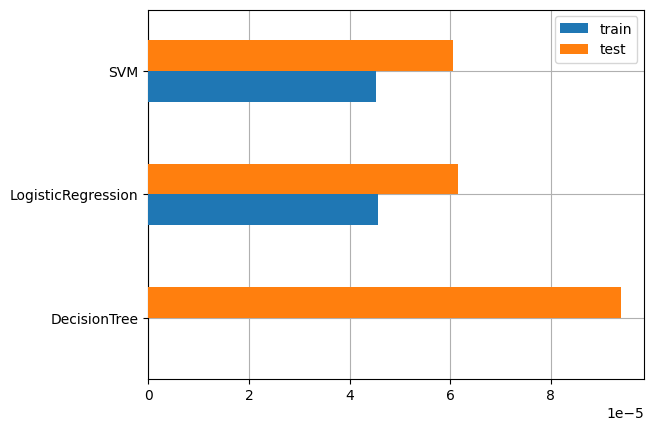

In [37]:
# Plot hasil MSE
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

                     Akurasi
DecisionTree        0.906067
LogisticRegression  0.938356
SVM                 0.939335


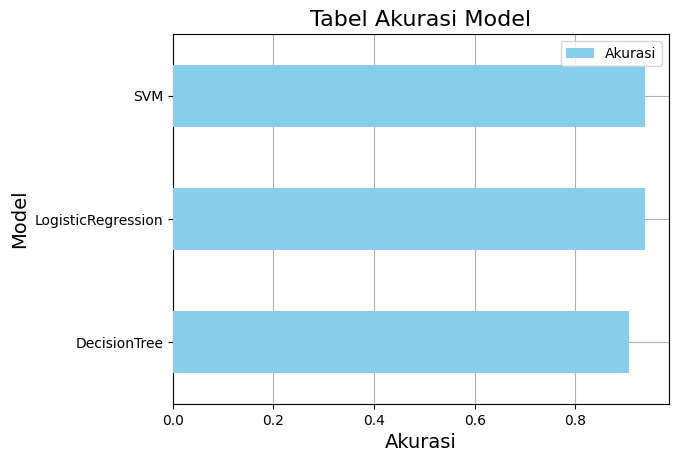

In [38]:
# Membuat tabel akurasi dari masing-masing metode
from sklearn.metrics import accuracy_score # Import accuracy_score

accuracy = pd.DataFrame(columns=['Akurasi'], index=['DecisionTree', 'LogisticRegression', 'SVM'])

for name, model in model_dict.items():
    acc = accuracy_score(Y_test, model.predict(X_test_std))
    accuracy.loc[name, 'Akurasi'] = acc

# Menampilkan tabel akurasi
print(accuracy)

# Plot tabel akurasi
fig, ax = plt.subplots()
accuracy.sort_values(by='Akurasi', ascending=True).plot(kind='barh', ax=ax, zorder=3, color="skyblue")
ax.set_title('Tabel Akurasi Model', fontsize=16)
ax.set_xlabel('Akurasi', fontsize=14)
ax.set_ylabel('Model', fontsize=14)
ax.grid(zorder=0)
plt.show()

In [39]:
import random

# Prediksi untuk 3 data acak dari X_test
random_indices = random.sample(range(len(X_test)), 3)  # Pilih 3 indeks acak
prediksi = X_test.iloc[random_indices].copy()
pred_dict = {'y_true': Y_test.iloc[random_indices]}  # Ambil nilai target sebenarnya

for name, model in model_dict.items():
    # Standardize the prediction data before feeding it to the model
    prediksi_std = std.transform(prediksi)
    pred_dict['prediksi_' + name] = model.predict(prediksi_std).round(1)

# Menampilkan hasil prediksi
pd.DataFrame(pred_dict)

,y_true,prediksi_DecisionTree,prediksi_LogisticRegression,prediksi_SVM
1173,0,0,0,0
1775,0,0,0,0
4169,0,0,0,0


 Hasil keluaran berupa tabel yang menampilkan perbandingan antara nilai target sebenarnya (y_true) dengan hasil prediksi dari beberapa model (DecisionTree, LogisticRegression, dan SVM).

 Semua model memberikan prediksi 0 untuk ketiga sampel, yang sesuai dengan nilai y_true.